In [2]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt 
# import cv2
from os import path 
import time
print("started")

started


In [3]:
# datasets_folder = "E:\\dataset\\main_project\\datasets"
datasets_folder = "/media/abk/DATA 2/dataset/main_project_updated/datasets"
# elephant_dataset = path.join(datasets_folder,"elephant")
# wild_board_dataset = path.join(datasets_folder,"wild_boar")
# bird_dataset = path.join(datasets_folder,"bird")



batch_size = 64
img_height = 180
img_width = 180

In [4]:
color_mode = "grayscale"
# color_mode = 'rgb'
train_ds = keras.utils.image_dataset_from_directory(
    datasets_folder,
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode=color_mode,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 6978 files belonging to 5 classes.
Using 5583 files for training.


2023-05-03 12:22:55.303343: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-03 12:22:55.313157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-03 12:22:55.313460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-03 12:22:55.313959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [5]:

val_ds = keras.utils.image_dataset_from_directory(
    datasets_folder,
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode=color_mode,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 6978 files belonging to 5 classes.
Using 1395 files for validation.


['bird', 'elephant', 'person', 'undetected', 'wild_boar']


2023-05-03 12:24:07.733520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-03 12:24:09.095079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


finished


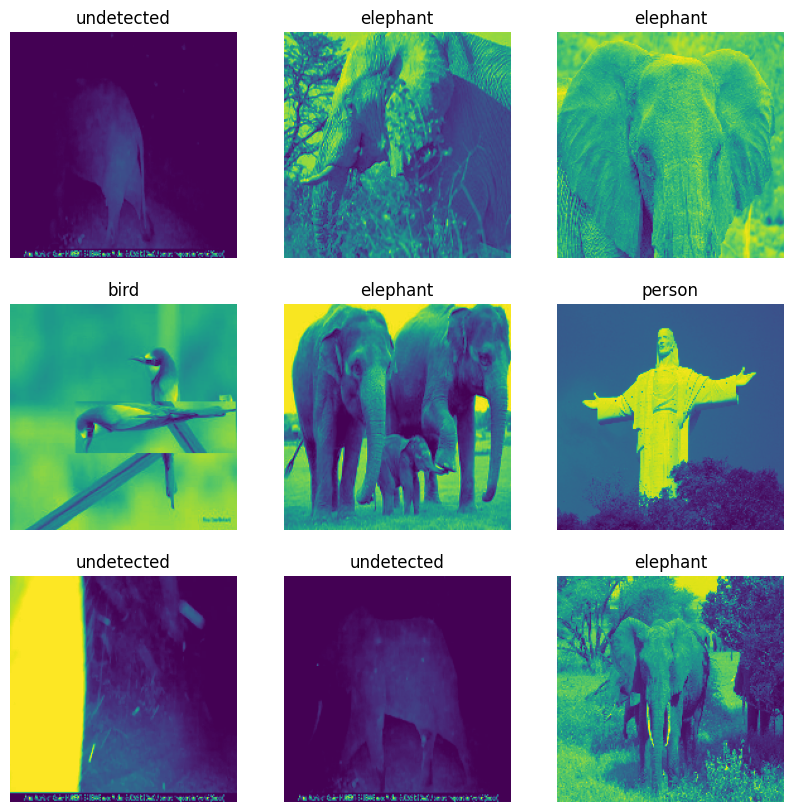

In [6]:
class_names = train_ds.class_names 
print(class_names)
class_len = len(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    
print("finished")






In [7]:
AUTOTUNE = tf.data.AUTOTUNE 

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
print("finished")



finished


In [ ]:
# data_augmentation = tf.keras.Sequential(
#   [
#     tf.keras.layers.RandomFlip("horizontal",
#                       input_shape=(img_height,
#                                   img_width,
#                                   1)),
#     tf.keras.layers.RandomRotation(0.4),
#     tf.keras.layers.RandomZoom(0.1),
#   ]
# )

In [16]:
model = keras.models.Sequential([
    # data_augmentation,
    keras.layers.Rescaling(1./255, input_shape=(img_height,img_width,1)),
    keras.layers.Conv2D(16,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(class_len , activation='softmax')

])







model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=keras.metrics.SparseCategoricalAccuracy())

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 1)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 16)      160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 64)       

In [18]:
epochs =  15
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs , verbose=1)

Epoch 1/15
88/88 [==============================] - 8s 69ms/step - loss: 1.2325 - sparse_categorical_accuracy: 0.4865 - val_loss: 1.0492 - val_sparse_categorical_accuracy: 0.5749
Epoch 2/15
88/88 [==============================] - 6s 65ms/step - loss: 0.8785 - sparse_categorical_accuracy: 0.6609 - val_loss: 0.8418 - val_sparse_categorical_accuracy: 0.6846
Epoch 3/15
88/88 [==============================] - 6s 66ms/step - loss: 0.6691 - sparse_categorical_accuracy: 0.7474 - val_loss: 0.7568 - val_sparse_categorical_accuracy: 0.7197
Epoch 4/15
88/88 [==============================] - 6s 67ms/step - loss: 0.4957 - sparse_categorical_accuracy: 0.8152 - val_loss: 0.7049 - val_sparse_categorical_accuracy: 0.7548
Epoch 5/15
88/88 [==============================] - 6s 66ms/step - loss: 0.3400 - sparse_categorical_accuracy: 0.8786 - val_loss: 0.6872 - val_sparse_categorical_accuracy: 0.7606
Epoch 6/15
88/88 [==============================] - 6s 67ms/step - loss: 0.2359 - sparse_categorical_accu

In [17]:
# acc = history.history['val_accuracy']
acc = history.history['val_sparse_categorical_accuracy']
print(acc)
final_acc = acc[len(acc) - 1]
ts = time.time()

model.save(f"m-ulyr-e32(e-{epochs})-{round(final_acc,4)}-(h-det,ud).h5")

[0.6559139490127563, 0.6788530349731445, 0.7419354915618896, 0.7677419185638428, 0.7462365627288818, 0.7569892406463623, 0.7971326112747192, 0.7949820756912231, 0.7842293977737427, 0.7770609259605408, 0.7806451320648193, 0.7921146750450134, 0.7792114615440369, 0.7827957272529602, 0.7870967984199524]


1/1 [==============================] - 0s 18ms/step
animal : bird | accuracy :  0.0
animal : elephant | accuracy :  87.98
animal : person | accuracy :  11.53
animal : undetected | accuracy :  0.0
animal : wild_boar | accuracy :  0.49


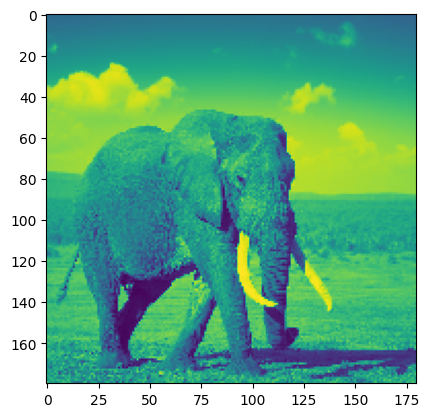

In [14]:
img = tf.keras.utils.load_img(
    "test/e2.jpg",
    target_size = (img_height,img_width),
    color_mode = color_mode 
)


img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)

# score = tf.nn.softmax(predictions[0])
score = predictions[0]

print(f"animal : {class_names[0]} | accuracy :  {round(np.array(score)[0] * 100,2)}")
print(f"animal : {class_names[1]} | accuracy :  {round(np.array(score)[1] * 100,2)}")
print(f"animal : {class_names[2]} | accuracy :  {round(np.array(score)[2] * 100,2)}")
if len(class_names) > 3 :
    print(f"animal : {class_names[3]} | accuracy :  {round(np.array(score)[3] * 100,2)}")
if len(class_names) > 4 :
    print(f"animal : {class_names[4]} | accuracy :  {round(np.array(score)[4] * 100,2)}")
plt.imshow(img)


1/1 [==============================] - 0s 21ms/step


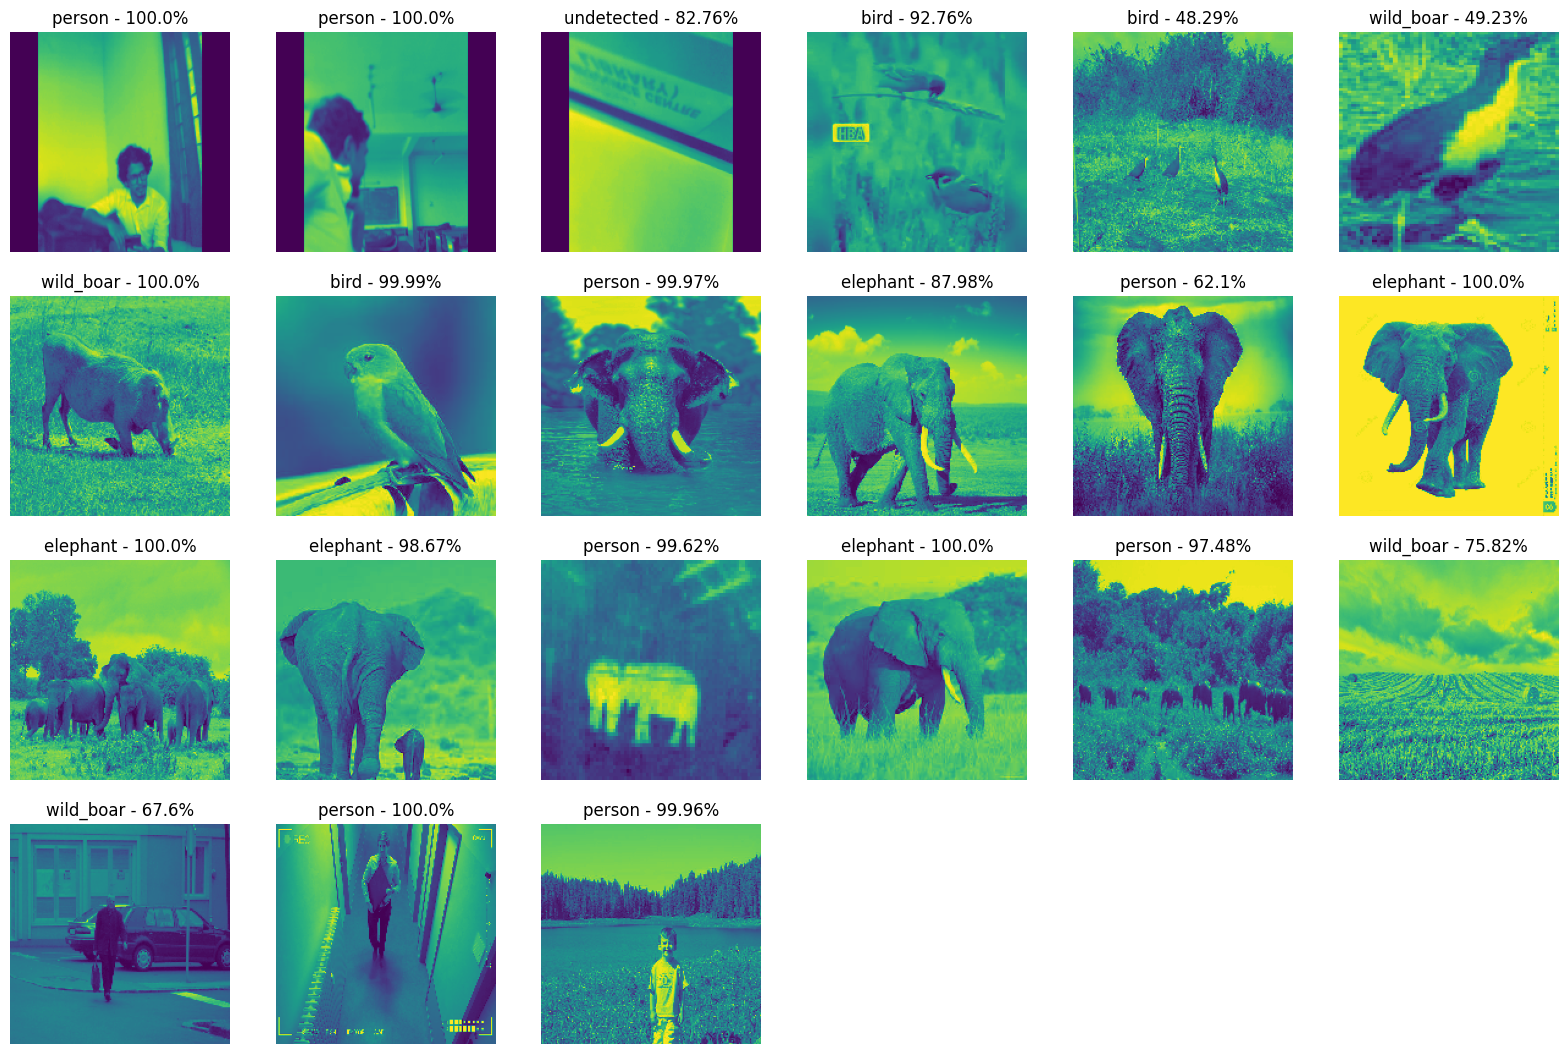

In [15]:

import os
plt.figure(figsize=(20, 20))

for i,file in enumerate(os.listdir('test')):
    img = tf.keras.utils.load_img(
    f'test/{file}',
    target_size = (img_height,img_width),
    color_mode = color_mode 
    )


    img_array = tf.keras.utils.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    # score = tf.nn.softmax(predictions[0])
    score = predictions[0]
    # print(score)

    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img)
    s = round(np.array(score)[0] * 100,2) 
    plt.title(f"{class_names[score.argmax()]} - {round(np.max(score) * 100,2)}%" )
    plt.axis("off")